<a href="https://colab.research.google.com/github/ginacu/capstone-project-CSD-096/blob/main/Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Aplikasi Rekomendasi Skincare Berdasarkan Permasalahan Wajah

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import plotly.express as px
import seaborn as sns
import missingno as mno
from sklearn.manifold import TSNE

In [2]:
# Import the Dataset 

from google.colab import drive
drive.mount('/content/drive') 

Mounted at /content/drive


In [3]:
!ls "/content/drive/MyDrive/Dataset/Capstone-Dataset-rev2 (2).csv"

'/content/drive/MyDrive/Dataset/Capstone-Dataset-rev2 (2).csv'


Preliminary Exploration

In [4]:
skincare = pd.read_csv('/content/drive/MyDrive/Dataset/Capstone-Dataset-rev2 (2).csv', low_memory=False)
skincare.info()
skincare.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1034 entries, 0 to 1033
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   produk-href      1034 non-null   object 
 1   product_name     1034 non-null   object 
 2   price            1034 non-null   object 
 3   description      1034 non-null   object 
 4   notable_effects  1034 non-null   object 
 5   skintype         1031 non-null   object 
 6   picture_src      1034 non-null   object 
 7   tipe_produk      1034 non-null   object 
 8   Unnamed: 8       0 non-null      float64
 9   Unnamed: 9       0 non-null      float64
 10  Unnamed: 10      0 non-null      float64
 11  Unnamed: 11      0 non-null      float64
 12  Unnamed: 12      0 non-null      float64
 13  Unnamed: 13      0 non-null      float64
 14  Unnamed: 14      0 non-null      float64
 15  Unnamed: 15      0 non-null      float64
 16  Unnamed: 16      0 non-null      float64
 17  Unnamed: 17   

,produk-href,product_name,price,description,notable_effects,skintype,picture_src,tipe_produk,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,https://www.beautyhaul.com/product/detail/acne...,Acne Gentle Cleansing Foam,Rp 35.000,Pembersih wajah bebas minyak untuk kulit BERJE...,"Acne-Free, Oil-Control, Pore-Care",Dry,https://www.beautyhaul.com/assets/uploads/prod...,facewash,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,https://www.beautyhaul.com/product/detail/aloe...,Natur Aloe Mild Cleanser,Rp 79.000,Natur Aloe Mild Cleanser dengan brush yang lem...,"Pore-Care, Brightening, Anti-Aging","Dry, Oily, Sensitive",https://www.beautyhaul.com/assets/uploads/prod...,facewash,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://www.beautyhaul.com/product/detail/acne...,Acne Care Lab Cleanser Scrub,Rp 104.500,Acne Care Lab Acne Cleanser Scrub Beta Plus (A...,Acne-Free,Dry,https://www.beautyhaul.com/assets/uploads/prod...,facewash,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://www.beautyhaul.com/product/detail/brig...,Brightening Facial Cleanser,Rp 35.000,"Pembersih wajah yang segar, lembut dan creamy ...","Acne-Free, Pore-Care, Brightening, Anti-Aging","Dry, Oily, Sensitive",https://www.beautyhaul.com/assets/uploads/prod...,facewash,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://www.beautyhaul.com/product/detail/pome...,Natur Pome Mild Cleanser,Rp 79.000,Natur Pome Mild Cleanser dengan brush yang lem...,"Pore-Care, Brightening, Anti-Aging","Dry, Oily, Sensitive",https://www.beautyhaul.com/assets/uploads/prod...,facewash,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Remove column Unnamed 8-25 as not important to the model 

skincare.drop(["Unnamed: 8", "Unnamed: 9", "Unnamed: 10", "Unnamed: 11", "Unnamed: 12", "Unnamed: 13", "Unnamed: 14", "Unnamed: 15", "Unnamed: 16", "Unnamed: 17", "Unnamed: 18", "Unnamed: 19", "Unnamed: 20", "Unnamed: 21", "Unnamed: 22", "Unnamed: 23", "Unnamed: 24", "Unnamed: 25"], axis=1, inplace=True)
skincare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1034 entries, 0 to 1033
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   produk-href      1034 non-null   object
 1   product_name     1034 non-null   object
 2   price            1034 non-null   object
 3   description      1034 non-null   object
 4   notable_effects  1034 non-null   object
 5   skintype         1031 non-null   object
 6   picture_src      1034 non-null   object
 7   tipe_produk      1034 non-null   object
dtypes: object(8)
memory usage: 64.8+ KB


# Data Exploration 

In [6]:
# Let's look at the unique classes in data
skincare['notable_effects'].unique()

array(['Acne-Free, Oil-Control, Pore-Care',
       'Pore-Care, Brightening, Anti-Aging', 'Acne-Free',
       'Acne-Free, Pore-Care, Brightening, Anti-Aging', 'Anti-Aging',
       'Soothing, Brightening', 'Cleansing', 'Soothing, Moisturizing',
       'Hydrating, Soothing', 'Moisturizing',
       'Brightening, Anti-Aging, UV-Protection',
       'Hydrating, Moisturizing', 'Acne-Free, Brightening, Anti-Aging',
       'Anti-Aging\n', 'UV-Protection', 'Brightening, Anti-Aging',
       'Soothing, Balancing', 'Anti-Aging, UV-Protection',
       'Moisturizing, Brightening, Black-Spot',
       'Pore-Care,  Brightening, Anti-Aging',
       'Acne-Free,  Pore-Care, Anti-Aging', 'Brightening, UV-Protection',
       'Moisturizing, UV-Protection', 'UV-Protection, No-Whitecast'],
      dtype=object)

In [7]:
# Looking at number of classes 
skincare['notable_effects'].nunique()

24

In [8]:
categorical_features = ['notable_effects', 'skintype', 'tipe_produk']

(array([], dtype=float64), <a list of 0 Text major ticklabel objects>)

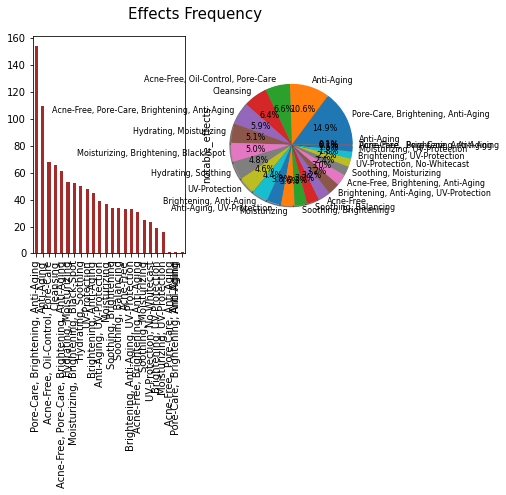

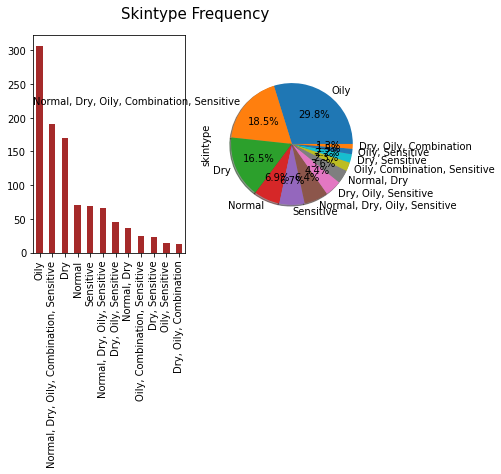

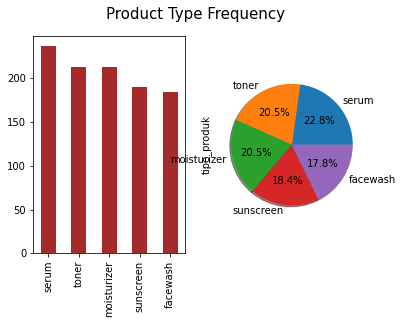

In [9]:
#Plotting Categorical Variables

fig, ax = plt.subplots(1, 2)
skincare["notable_effects"].value_counts().plot.bar(color="brown", ax=ax[0])
skincare["notable_effects"].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,textprops={"fontsize": 8},ax=ax[1])
fig.suptitle("Effects Frequency", fontsize=15)
plt.xticks(rotation=90)
plt.yticks(rotation=45)

fig, ax = plt.subplots(1, 2)
skincare["skintype"].value_counts().plot.bar(color="brown", ax=ax[0])
skincare["skintype"].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,textprops={"fontsize": 10},ax=ax[1])
fig.suptitle("Skintype Frequency", fontsize=15)
plt.xticks(rotation=90)
plt.yticks(rotation=45)

fig, ax = plt.subplots(1, 2)
skincare["tipe_produk"].value_counts().plot.bar(color="brown", ax=ax[0])
skincare["tipe_produk"].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,textprops={"fontsize": 10},ax=ax[1])
fig.suptitle("Product Type Frequency", fontsize=15)
plt.xticks(rotation=90)
plt.yticks(rotation=45)

In [10]:
# Creating numerical labels of notable_effects due to many effects shown by the diagram above
skincare['notable_effects']=skincare['notable_effects'].astype('category')
skincare['labels']=skincare['notable_effects'].cat.codes
skincare.head()

,produk-href,product_name,price,description,notable_effects,skintype,picture_src,tipe_produk,labels
0,https://www.beautyhaul.com/product/detail/acne...,Acne Gentle Cleansing Foam,Rp 35.000,Pembersih wajah bebas minyak untuk kulit BERJE...,"Acne-Free, Oil-Control, Pore-Care",Dry,https://www.beautyhaul.com/assets/uploads/prod...,facewash,3
1,https://www.beautyhaul.com/product/detail/aloe...,Natur Aloe Mild Cleanser,Rp 79.000,Natur Aloe Mild Cleanser dengan brush yang lem...,"Pore-Care, Brightening, Anti-Aging","Dry, Oily, Sensitive",https://www.beautyhaul.com/assets/uploads/prod...,facewash,18
2,https://www.beautyhaul.com/product/detail/acne...,Acne Care Lab Cleanser Scrub,Rp 104.500,Acne Care Lab Acne Cleanser Scrub Beta Plus (A...,Acne-Free,Dry,https://www.beautyhaul.com/assets/uploads/prod...,facewash,0
3,https://www.beautyhaul.com/product/detail/brig...,Brightening Facial Cleanser,Rp 35.000,"Pembersih wajah yang segar, lembut dan creamy ...","Acne-Free, Pore-Care, Brightening, Anti-Aging","Dry, Oily, Sensitive",https://www.beautyhaul.com/assets/uploads/prod...,facewash,4
4,https://www.beautyhaul.com/product/detail/pome...,Natur Pome Mild Cleanser,Rp 79.000,Natur Pome Mild Cleanser dengan brush yang lem...,"Pore-Care, Brightening, Anti-Aging","Dry, Oily, Sensitive",https://www.beautyhaul.com/assets/uploads/prod...,facewash,18


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



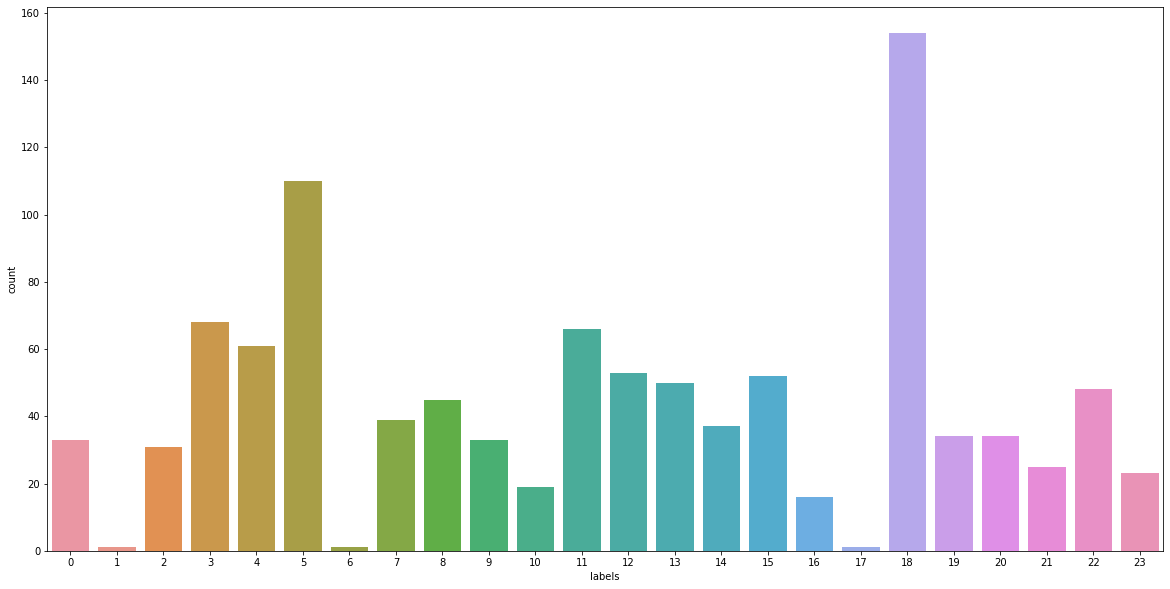

In [11]:
# Looking at the label distribution
plt.figure(figsize=(20,10))
sns.countplot(skincare['labels'])

In [12]:
# Checking data balancing 

auto_balancing = pd.DataFrame()
auto_balancing["Count"] = skincare["skintype"].value_counts()
auto_balancing["Count%"] = skincare["skintype"].value_counts()/skincare.shape[0]*100

auto_balancing

,Count,Count%
Oily,307,29.690522
"Normal, Dry, Oily, Combination, Sensitive",191,18.471954
Dry,170,16.441006
Normal,71,6.866538
Sensitive,69,6.673114
"Normal, Dry, Oily, Sensitive",66,6.382979
"Dry, Oily, Sensitive",45,4.352031
"Normal, Dry",37,3.578337
"Oily, Combination, Sensitive",24,2.321083
"Dry, Sensitive",23,2.224371


In [13]:
# Checking data balancing (for classification)

auto_balancing = pd.DataFrame()
auto_balancing["Count"] = skincare["tipe_produk"].value_counts()
auto_balancing["Count%"] = skincare["tipe_produk"].value_counts()/skincare.shape[0]*100

auto_balancing

,Count,Count%
serum,236,22.823985
toner,212,20.502901
moisturizer,212,20.502901
sunscreen,190,18.375242
facewash,184,17.794971


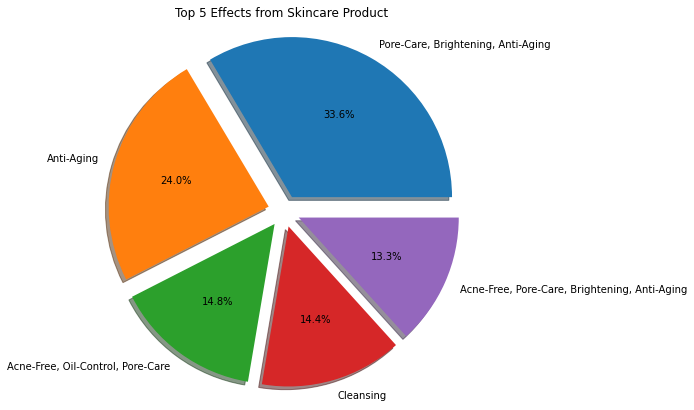

In [14]:
# Plotting top notable_effects from skincare product 

top_effects=(skincare['notable_effects'].value_counts()).to_dict()
count= pd.DataFrame(list(top_effects.items()),columns = ['c','count'])
a = count.sort_values(by=['count'], ascending = False)
a.head(5)
labels = 'Pore-Care, Brightening, Anti-Aging','Anti-Aging','Acne-Free, Oil-Control, Pore-Care','Cleansing','Acne-Free, Pore-Care, Brightening, Anti-Aging'
sizes = [count['count'].iloc[0],count['count'].iloc[1],count['count'].iloc[2],count['count'].iloc[3],count['count'].iloc[4]]
explode = (0.1, 0.1, 0.1, 0.1,0.1)
fig1 , ax1 = plt.subplots(figsize=(7,7))
ax1.pie(sizes,
        explode = explode,
        labels = labels,
        autopct = '%1.1f%%',
        shadow = True,
        startangle = 0)
plt.title("Top 5 Effects from Skincare Product")
ax1.axis ('equal')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



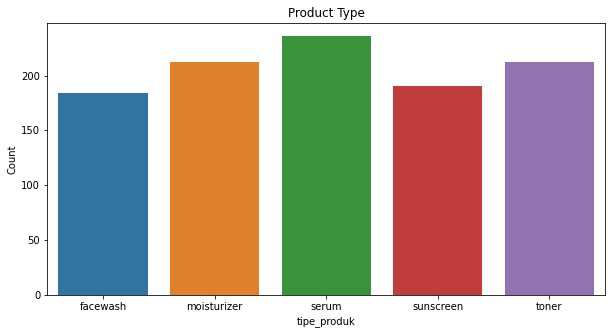

In [15]:
plt.subplots(figsize=(10,5))
sns.countplot(skincare['tipe_produk'].sort_values())
plt.xlabel('tipe_produk')
plt.ylabel('Count')
plt.title('Product Type')

plt.show()

In [16]:
# Checking null value 

skincare.isnull().sum()

produk-href        0
product_name       0
price              0
description        0
notable_effects    0
skintype           3
picture_src        0
tipe_produk        0
labels             0
dtype: int64

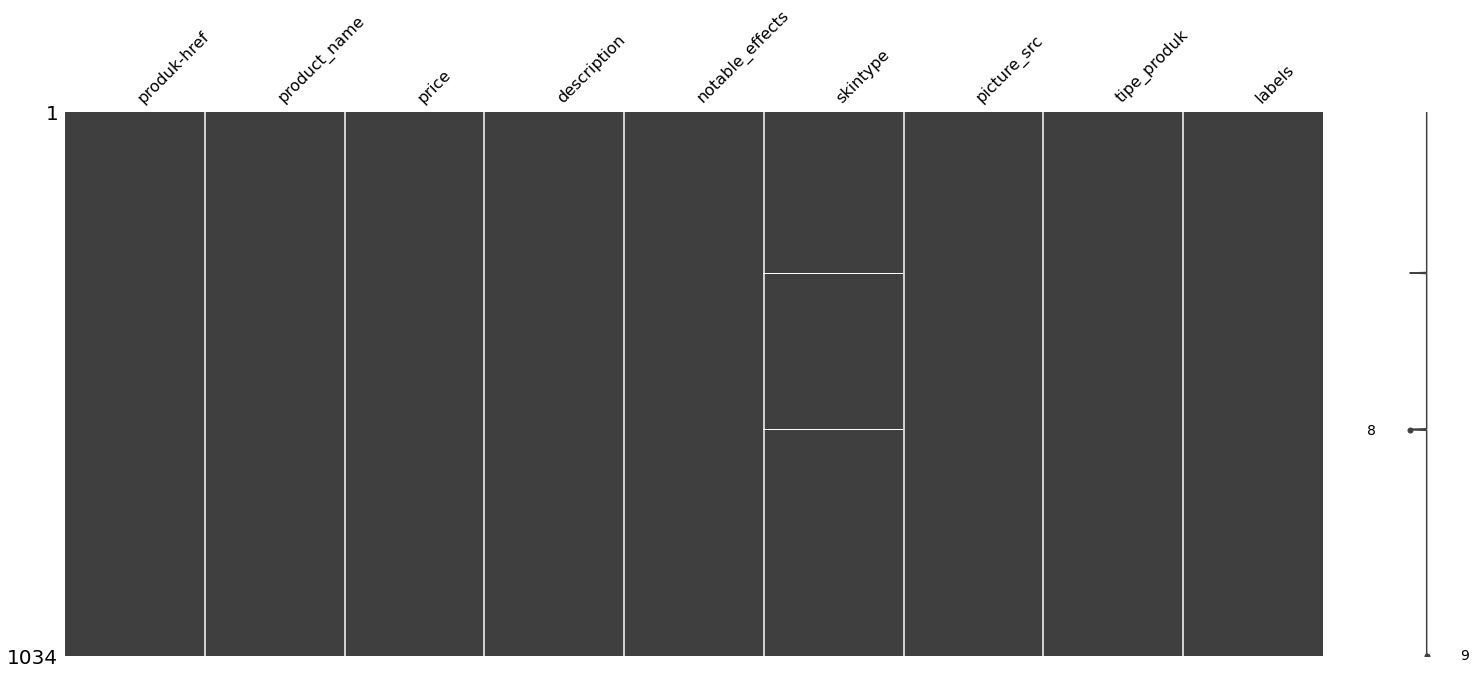

In [17]:
# Visualize the missing values in the dataframe

mno.matrix(skincare)

In [18]:
# Checking the existence of duplicated rows

skincare.duplicated().sum()

2

# Data Cleaning

In [19]:
# Remove duplicated rows (2 in total)

skincare.drop_duplicates(inplace=True)

# Replacing the missing values"

skincare["skintype"].fillna("Dry, Oily, Combination", inplace=True)

In [20]:
# Re-checking null value 

skincare.isnull().sum()

# Re-hecking the existence of duplicated rows

skincare.duplicated().sum()

0

In [21]:
skincare.head(10)

,produk-href,product_name,price,description,notable_effects,skintype,picture_src,tipe_produk,labels
0,https://www.beautyhaul.com/product/detail/acne...,Acne Gentle Cleansing Foam,Rp 35.000,Pembersih wajah bebas minyak untuk kulit BERJE...,"Acne-Free, Oil-Control, Pore-Care",Dry,https://www.beautyhaul.com/assets/uploads/prod...,facewash,3
1,https://www.beautyhaul.com/product/detail/aloe...,Natur Aloe Mild Cleanser,Rp 79.000,Natur Aloe Mild Cleanser dengan brush yang lem...,"Pore-Care, Brightening, Anti-Aging","Dry, Oily, Sensitive",https://www.beautyhaul.com/assets/uploads/prod...,facewash,18
2,https://www.beautyhaul.com/product/detail/acne...,Acne Care Lab Cleanser Scrub,Rp 104.500,Acne Care Lab Acne Cleanser Scrub Beta Plus (A...,Acne-Free,Dry,https://www.beautyhaul.com/assets/uploads/prod...,facewash,0
3,https://www.beautyhaul.com/product/detail/brig...,Brightening Facial Cleanser,Rp 35.000,"Pembersih wajah yang segar, lembut dan creamy ...","Acne-Free, Pore-Care, Brightening, Anti-Aging","Dry, Oily, Sensitive",https://www.beautyhaul.com/assets/uploads/prod...,facewash,4
4,https://www.beautyhaul.com/product/detail/pome...,Natur Pome Mild Cleanser,Rp 79.000,Natur Pome Mild Cleanser dengan brush yang lem...,"Pore-Care, Brightening, Anti-Aging","Dry, Oily, Sensitive",https://www.beautyhaul.com/assets/uploads/prod...,facewash,18
5,https://www.beautyhaul.com/product/detail/gent...,FSS Gentle Cleansing Foam Refill,Rp 100.000,FSS Gentle Cleansing Foam tersedia dalam kanto...,Anti-Aging,Dry,https://www.beautyhaul.com/assets/uploads/prod...,facewash,5
6,https://www.beautyhaul.com/product/detail/c-wh...,C White Lightening Tone Up Body Serum,Rp 47.000,Serum ringan untuk tubuh agar tampak lebih cer...,"Pore-Care, Brightening, Anti-Aging",Dry,https://www.beautyhaul.com/assets/uploads/prod...,facewash,18
7,https://www.beautyhaul.com/product/detail/cica...,Natur Cica Mild Cleanser,Rp 79.000,Natur Cica Mild Cleanser dengan brush yang lem...,"Pore-Care, Brightening, Anti-Aging","Dry, Oily, Sensitive",https://www.beautyhaul.com/assets/uploads/prod...,facewash,18
8,https://www.beautyhaul.com/product/detail/foam...,Foamwork PH 50-60 Foaming Cleanser,Rp 109.000,Self-foaming cleanser (pH = 5.0-6.0) 100ml Dib...,Anti-Aging,Oily,https://www.beautyhaul.com/assets/uploads/prod...,facewash,5
9,https://www.beautyhaul.com/product/detail/gott...,Gotta Smooth Gentle Exfoliating Cleanser,Rp 140.000,Pembersih wajah dengan tekstur gel yang dapat ...,"Acne-Free, Oil-Control, Pore-Care",Dry,https://www.beautyhaul.com/assets/uploads/prod...,facewash,3


# Data Preparation

## Encoding each skintypes

In [22]:
# treat null values
skincare['skintype'].fillna('NA', inplace = True)

# separate all skintype into one list, considering comma + space as separators
skintype = skincare['skintype'].str.split(', ').tolist()

# flatten the list
flat_skintype = [item for sublist in skintype for item in sublist]

# convert to a set to make unique
set_skintype = set(flat_skintype)

# back to list
unique_skintype = list(set_skintype)

# create columns by each unique skintype
skincare = skincare.reindex(skincare.columns.tolist() + unique_skintype, axis=1, fill_value=0)

# for each value inside column, update the dummy
for index, row in skincare.iterrows():
    for val in row.skintype.split(', '):
        if val != 'NA':
            skincare.loc[index, val] = 1

skincare.drop('skintype', axis = 1, inplace = True)    
skincare

,produk-href,product_name,price,description,notable_effects,picture_src,tipe_produk,labels,Normal,Sensitive,Oily,Combination,Dry
0,https://www.beautyhaul.com/product/detail/acne...,Acne Gentle Cleansing Foam,Rp 35.000,Pembersih wajah bebas minyak untuk kulit BERJE...,"Acne-Free, Oil-Control, Pore-Care",https://www.beautyhaul.com/assets/uploads/prod...,facewash,3,0,0,0,0,1
1,https://www.beautyhaul.com/product/detail/aloe...,Natur Aloe Mild Cleanser,Rp 79.000,Natur Aloe Mild Cleanser dengan brush yang lem...,"Pore-Care, Brightening, Anti-Aging",https://www.beautyhaul.com/assets/uploads/prod...,facewash,18,0,1,1,0,1
2,https://www.beautyhaul.com/product/detail/acne...,Acne Care Lab Cleanser Scrub,Rp 104.500,Acne Care Lab Acne Cleanser Scrub Beta Plus (A...,Acne-Free,https://www.beautyhaul.com/assets/uploads/prod...,facewash,0,0,0,0,0,1
3,https://www.beautyhaul.com/product/detail/brig...,Brightening Facial Cleanser,Rp 35.000,"Pembersih wajah yang segar, lembut dan creamy ...","Acne-Free, Pore-Care, Brightening, Anti-Aging",https://www.beautyhaul.com/assets/uploads/prod...,facewash,4,0,1,1,0,1
4,https://www.beautyhaul.com/product/detail/pome...,Natur Pome Mild Cleanser,Rp 79.000,Natur Pome Mild Cleanser dengan brush yang lem...,"Pore-Care, Brightening, Anti-Aging",https://www.beautyhaul.com/assets/uploads/prod...,facewash,18,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1029,https://www.sociolla.com/sunscreen/51163-prote...,Pond's Protecting Day Cream Sunscreen Skin Pro...,Rp 26.400,POND’S Skin Protect Protecting Day Cream Tahuk...,"Moisturizing, UV-Protection","https://www.soco.id/cdn-cgi/image/w=73,format=...",sunscreen,16,1,1,1,1,1
1030,https://www.sociolla.com/sunscreen/16938-weigh...,For Skins Sake Weightless Sunscreen,Rp 40.000,This is the mini version of the FSS Weightless...,"UV-Protection, No-Whitecast",https://s3-ap-southeast-1.amazonaws.com/img-so...,sunscreen,23,1,1,1,1,1
1031,https://www.sociolla.com/sunscreen/12298-papay...,Benton Papaya S-Sun Cream,Rp 330.000,Papaya S-Sun Cream adalah suncream fisika dan ...,"Brightening, UV-Protection",https://s3-ap-southeast-1.amazonaws.com/img-so...,sunscreen,10,1,1,1,1,1
1032,https://www.sociolla.com/sunscreen/47934-kem-c...,Innisfree Intensive Leisure Sunscreen Stick SP...,Rp 270.000,"Stik tabir surya yang tahan air dan keringat, ...",UV-Protection,"https://www.soco.id/cdn-cgi/image/w=73,format=...",sunscreen,22,1,1,1,1,1


# Modelling

## Applying NLP concept

The map we’re making is the plot with an optional choice so that the users can get a more detailed result. There are going to be two kinds of options. One for the categories of product type such as moisturizer and sunscreen. The other for the skin types of users such as dry and oily. For make it clear, let’s focus on an option for “moisturizers for dry skin type” first and then apply the same process to other options later.

In [23]:
# Filter for moisturizers
moisturizers = skincare[skincare['tipe_produk'] == 'moisturizer']

# Filter for dry skin as well
moisturizers_dry = moisturizers[moisturizers['Dry'] == 1]

# Reset index
moisturizers_dry = moisturizers_dry.reset_index(drop=True)

In [24]:
moisturizers

,produk-href,product_name,price,description,notable_effects,picture_src,tipe_produk,labels,Normal,Sensitive,Oily,Combination,Dry
632,https://www.beautyhaul.com/product/detail/firs...,FIRST LAB Probiotic Cream,Rp 270.600,All FIRST LAB's Skincare are using a Patented ...,"Pore-Care, Brightening, Anti-Aging",https://www.beautyhaul.com/assets/uploads/prod...,moisturizer,18,0,1,0,0,0
633,https://www.beautyhaul.com/product/detail/day-...,NPURE Day & Night Treatment,Rp 200.000,Rangkaian Cica Day Cream (With Uv Protection S...,"Pore-Care, Brightening, Anti-Aging",https://www.beautyhaul.com/assets/uploads/prod...,moisturizer,18,0,1,0,0,0
634,https://www.beautyhaul.com/product/detail/comf...,HALE Comfort Zone,Rp 129.000,Fast-absorbing moisturizer that soothes irrita...,"Soothing, Brightening",https://www.beautyhaul.com/assets/uploads/prod...,moisturizer,20,0,1,0,0,0
635,https://www.beautyhaul.com/product/detail/m-ma...,M+ Madecassoside Cica Cream,Rp 295.000,Charis M+ Madecassoside Cica Cream Solusi untu...,"Pore-Care, Brightening, Anti-Aging",https://www.beautyhaul.com/assets/uploads/prod...,moisturizer,18,0,1,0,0,0
636,https://www.beautyhaul.com/product/detail/acne...,CHARIS ACNECORE+ Clear AC Everyday Moisturizer,Rp 99.000,Pelembab wajah untuk kulit berjerawat & berpor...,UV-Protection,https://www.beautyhaul.com/assets/uploads/prod...,moisturizer,22,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
839,https://www.sociolla.com/face-cream-lotion/166...,The Aubree Even Brighter Day Cream,Rp. 99.000,Krim dengan kemampuan membantu mencerahkan dan...,"Moisturizing, UV-Protection",https://s3-ap-southeast-1.amazonaws.com/img-so...,moisturizer,16,1,1,1,1,1
840,https://www.sociolla.com/face-cream-lotion/550...,Scarlett Whitening Scarlett Whitening Acne Day...,Rp 82.500,Didalam Acne Day Cream terdapat kandungan Doub...,Moisturizing,"https://www.soco.id/cdn-cgi/image/w=73,format=...",moisturizer,14,0,0,1,0,0
841,https://www.sociolla.com/face-gel/27920-waterm...,Dear Me Beauty Watermelon Multipurpose Gel,Rp 79.000,Experience instant boost of hydration with Wat...,Anti-Aging,"https://www.soco.id/cdn-cgi/image/w=73,format=...",moisturizer,5,1,1,1,1,1
842,https://www.sociolla.com/face-gel/10871-ms-pim...,Emina Ms Pimple Acne Solution Moisturizing Gel,Rp 24.000,Emina Ms Pimple Acne Solution Series merupakan...,"Acne-Free, Oil-Control, Pore-Care",https://s3-ap-southeast-1.amazonaws.com/img-so...,moisturizer,3,0,0,1,0,0


## Tokenizing the list of notable_effects

In [25]:
# Initialize dictionary, list, and initial index
notable_effect_dict = {}
corpus = []
idx = 0

# For loop for tokenization
for i in range(len(moisturizers_dry)):    
    notable_effects = moisturizers_dry['notable_effects'][i]
    notable_effects_lower = notable_effects.lower()
    tokens = notable_effects_lower.split(', ')
    corpus.append(tokens)
    for notable_effect in tokens:
        if notable_effect not in notable_effect_dict:
            notable_effect_dict[notable_effect] = idx
            idx += 1
            
# Check the result 
print("The index for acne-free is", notable_effect_dict['acne-free'])

The index for acne-free is 6


In [26]:
# Get the number of items and tokens 
M = moisturizers_dry.shape[0]              
N = len(notable_effect_dict)     # The number of the notable_effect

# Initialize a matrix of zeros
A = np.zeros((M, N))

In [27]:
# Define the one-hot encoding function
def encoding(tokens):
    x = np.zeros(A.shape[1])    
    for notable_effect in tokens:
        # Get the index for each notable_effect
        idx = notable_effect_dict[notable_effect]
        # Put 1 at the corresponding indices
        x[idx] = 1
    return x

In [28]:
# Make a document-term matrix
i = 0
for tokens in corpus:
    A[i, :] = encoding(tokens)
    i += 1

In [29]:
# Dimension reduction with t-SNE
model = TSNE(n_components=2, learning_rate=200, random_state=42)
tsne_features = model.fit_transform(A)

# Make X, Y columns 
moisturizers_dry['X'] = tsne_features[:, 0]
moisturizers_dry['Y'] = tsne_features[:, 1]

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.



## Comparing Items with Cosine Similarity

### Dimension reduction with SVD

In [30]:
from sklearn.decomposition import TruncatedSVD 
svd = TruncatedSVD()
Z = svd.fit_transform(A)

In [31]:
# Making the result as a data frame and combine all together
Z_moisturizers_dry = pd.DataFrame(data = Z, columns = ['SVD1', 'SVD2'])
cosm_svd = pd.concat([moisturizers_dry.iloc[:, 0:15], Z_moisturizers_dry], axis = 1)
cosm_svd

,produk-href,product_name,price,description,notable_effects,picture_src,tipe_produk,labels,Normal,Sensitive,Oily,Combination,Dry,X,Y,SVD1,SVD2
0,https://www.beautyhaul.com/product/detail/dew-...,Noola Dew Moisturizer,Rp 129.000,"* Teman baik kulit dehidrasi, kering atau irit...","Hydrating, Soothing",https://www.beautyhaul.com/assets/uploads/prod...,moisturizer,13,0,1,0,0,1,-3.480241,-5.340224,0.638495,-0.289465
1,https://www.beautyhaul.com/product/detail/brig...,SCARLETT BRIGHTENING Brightly Ever After Day C...,Rp 82.500,Didalam Brightly Ever After Day Cream terdapat...,"Brightening, Anti-Aging, UV-Protection",https://www.beautyhaul.com/assets/uploads/prod...,moisturizer,9,0,0,0,0,1,5.098697,-3.565189,0.652187,1.329960
2,https://www.beautyhaul.com/product/detail/some...,SOMETHINC Ceramic Skin Saviour Moisturizer Gel,Rp 299.000,"Delivers 18hr Moisture Lock Ceramic Skin, Plum...","Pore-Care, Brightening, Anti-Aging",https://www.beautyhaul.com/assets/uploads/prod...,moisturizer,18,0,0,0,0,1,8.231344,-4.377845,0.642966,1.453984
3,https://www.beautyhaul.com/product/detail/all-...,HALE All Rounder,Rp 129.000,A gel-cream moisturizer that provides your ski...,"Acne-Free, Pore-Care, Brightening, Anti-Aging",https://www.beautyhaul.com/assets/uploads/prod...,moisturizer,4,0,0,0,0,1,8.352729,-5.237091,0.668005,1.530992
4,https://www.beautyhaul.com/product/detail/goku...,HADA LABO Gokujyun Ultimate Moisturizing Lotio...,Rp 48.000,Mengandung 3 jenis Hyaluronic Acid untuk memba...,Moisturizing,https://www.beautyhaul.com/assets/uploads/prod...,moisturizer,14,0,0,0,0,1,-1.958186,-0.399648,0.750886,-0.318304
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,https://www.sociolla.com/face-cream-lotion/804...,Wardah Renew You Anti Aging Day Cream,Rp 47.500,Renew You Anti Aging Day Cream merupakan pelem...,"Anti-Aging, UV-Protection",https://s3-ap-southeast-1.amazonaws.com/img-so...,moisturizer,7,1,0,0,0,1,4.029466,-4.116002,0.307980,0.797205
104,https://www.sociolla.com/face-cream-lotion/240...,NPure CICA Day Cream,Rp 90.000,Formula intensif CICA Day Cream yang menggabun...,"Hydrating, Moisturizing","https://www.soco.id/cdn-cgi/image/w=73,format=...",moisturizer,12,0,1,0,0,1,-4.396222,-1.490077,1.200155,-0.597965
105,https://www.sociolla.com/face-cream-lotion/166...,The Aubree Even Brighter Day Cream,Rp. 99.000,Krim dengan kemampuan membantu mencerahkan dan...,"Moisturizing, UV-Protection",https://s3-ap-southeast-1.amazonaws.com/img-so...,moisturizer,16,1,1,1,1,1,0.377469,-1.362810,0.845224,-0.192534
106,https://www.sociolla.com/face-gel/27920-waterm...,Dear Me Beauty Watermelon Multipurpose Gel,Rp 79.000,Experience instant boost of hydration with Wat...,Anti-Aging,"https://www.soco.id/cdn-cgi/image/w=73,format=...",moisturizer,5,1,1,1,1,1,5.072959,-5.578344,0.213642,0.671434


In [32]:
cosm_svd = moisturizers_dry[moisturizers_dry.tipe_produk == 'Moisturizer_Dry'].reset_index()
myItem = cosm_svd[moisturizers_dry_2.notable_effects.str.contains('acne-free')]

NameError: ignored

In [ ]:
# initiating the column
moisturizers_dry_2['dist'] = 0.0

In [ ]:
# getting the array for myItem
X = myItem.SVD1.values
Y = myItem.SVD2.values
Point_1 = np.array([X, Y]).reshape(1, -1)

In [ ]:
# cosine similarities with other items
for i in range(len(moisturizers_dry_2)):
    P2 = np.array([moisturizers_dry_2['SVD1'][i], moisturizers_dry_2['SVD2'][i]]).reshape(-1, 1)
    moisturizers_dry_2.dist[i] = (P1 * P2).sum() / (np.sqrt(np.sum(P1))*np.sqrt(np.sum(P2)))

In [ ]:
moisturizers_dry_2

In [ ]:
# sorting by the similarity
moisturizers_dry_2 = moisturizers_dry_2.sort_values('dist')
moisturizers_dry_2[['product_name', 'myItem', 'dist']].head()